In [1]:
import pandas as pd
!pip install kaggle
!unzip jigsaw-toxic-comment-classification-challenge.zip
import os
import zipfile



unzip:  cannot find or open jigsaw-toxic-comment-classification-challenge.zip, jigsaw-toxic-comment-classification-challenge.zip.zip or jigsaw-toxic-comment-classification-challenge.zip.ZIP.


In [2]:
import os
import zipfile
import pandas as pd
# Load the dataset
if not os.path.exists('train.csv'):
    if os.path.exists('train.csv.zip'):
        with zipfile.ZipFile('train.csv.zip', 'r') as zip_ref:
            zip_ref.extractall()
        print("The file train.csv has been successfully extracted.")
    else:
        print("The file train.csv or train.csv.zip was not found.")
else:
    print("The file train.csv already exists in the current directory.")


The file train.csv has been successfully extracted.


In [3]:

if os.path.exists('train.csv'):
    train_data = pd.read_csv('train.csv')
    print(train_data.head())
else:
    print("The file train.csv was not found.")


                 id                                       comment_text  toxic  \
0  0000997932d777bf  Explanation\nWhy the edits made under my usern...      0   
1  000103f0d9cfb60f  D'aww! He matches this background colour I'm s...      0   
2  000113f07ec002fd  Hey man, I'm really not trying to edit war. It...      0   
3  0001b41b1c6bb37e  "\nMore\nI can't make any real suggestions on ...      0   
4  0001d958c54c6e35  You, sir, are my hero. Any chance you remember...      0   

   severe_toxic  obscene  threat  insult  identity_hate  
0             0        0       0       0              0  
1             0        0       0       0              0  
2             0        0       0       0              0  
3             0        0       0       0              0  
4             0        0       0       0              0  


In [8]:
# Load the dataset
if not os.path.exists('test.csv'):
    if os.path.exists('test.csv.zip'):

        with zipfile.ZipFile('test.csv.zip', 'r') as zip_ref:
            zip_ref.extractall()
        print("The file test.csv has been successfully extracted.")
    else:
        print("The file test.csv or test.csv.zip was not found.")
else:
    print("The file test.csv already exists in the current directory.")

test_data = pd.read_csv('test.csv')
print(test_data.head())


The file test.csv has been successfully extracted.
                 id                                       comment_text
0  00001cee341fdb12  Yo bitch Ja Rule is more succesful then you'll...
1  0000247867823ef7  == From RfC == \n\n The title is fine as it is...
2  00013b17ad220c46  " \n\n == Sources == \n\n * Zawe Ashton on Lap...
3  00017563c3f7919a  :If you have a look back at the source, the in...
4  00017695ad8997eb          I don't anonymously edit articles at all.


In [9]:
# Load the dataset
if not os.path.exists('sample_submission.csv'):
    if os.path.exists('sample_submission.csv.zip'):

        with zipfile.ZipFile('sample_submission.csv.zip', 'r') as zip_ref:
            zip_ref.extractall()
        print("The file sample_submission.csv has been successfully extracted.")
    else:
        print("The file sample_submission.csv or sample_submission.csv.zip was not found.")
else:
    print("The file sample_submission.csv already exists in the current directory.")


The file sample_submission.csv has been successfully extracted.


In [14]:
# submission = pd.read_csv('sample_submission.csv')

# submission.head()

In [16]:
# Load the file
if not os.path.exists('test_labels.csv'):
    if os.path.exists('test_labels.csv.zip'):
        with zipfile.ZipFile('test_labels.csv.zip', 'r') as zip_ref:
            zip_ref.extractall()
        print("The file test_labels.csv has been successfully extracted.")
    else:
        print("The file test_labels.csv or test_labels.csv.zip was not found.")
else:
    print("The file test_labels.csv already exists in the current directory.")

if os.path.exists('test_labels.csv'):
    test_labels = pd.read_csv('test_labels.csv')
    print("Previewing the first 5 rows of the test_labels.csv file:")
    print(test_labels.head())
else:
    print("Failed to find the file test_labels.csv.")


The file test_labels.csv has been successfully extracted.
Previewing the first 5 rows of the test_labels.csv file:
                 id  toxic  severe_toxic  obscene  threat  insult  \
0  00001cee341fdb12     -1            -1       -1      -1      -1   
1  0000247867823ef7     -1            -1       -1      -1      -1   
2  00013b17ad220c46     -1            -1       -1      -1      -1   
3  00017563c3f7919a     -1            -1       -1      -1      -1   
4  00017695ad8997eb     -1            -1       -1      -1      -1   

   identity_hate  
0             -1  
1             -1  
2             -1  
3             -1  
4             -1  


In [7]:
# Information of the dataset
data = pd.read_csv('train.csv')
print("\nDataset information:")
print(data.info())


Dataset information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159571 entries, 0 to 159570
Data columns (total 8 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   id             159571 non-null  object
 1   comment_text   159571 non-null  object
 2   toxic          159571 non-null  int64 
 3   severe_toxic   159571 non-null  int64 
 4   obscene        159571 non-null  int64 
 5   threat         159571 non-null  int64 
 6   insult         159571 non-null  int64 
 7   identity_hate  159571 non-null  int64 
dtypes: int64(6), object(2)
memory usage: 9.7+ MB
None


In [34]:
# Defining class columns
class_columns = ['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']

# Calculating the number of labels in each class
class_counts = data[class_columns].sum()

# Analyzing comments with no labels
no_labels_count = (data[class_columns].sum(axis=1) == 0).sum()

# Calculating percentage distribution
total_comments = len(data)
class_percentages = class_counts / total_comments * 100
no_labels_percentage = no_labels_count / total_comments * 100

# Formatted output
print("Distribution among classes and without labels:")
print(f"{'Class':<15}{'Count':<15}{'Percentage':<10}")
print("-" * 40)
for label, count in class_counts.items():
    percentage = class_percentages[label]
    print(f"{label:<15}{count:<15}{percentage:<10.2f}%")
print(f"{'Non-toxic':<15}{no_labels_count:<15}{no_labels_percentage:<10.2f}%")

Distribution among classes and without labels:
Class          Count          Percentage
----------------------------------------
toxic          15294          9.58      %
severe_toxic   1595           1.00      %
obscene        8449           5.29      %
threat         478            0.30      %
insult         7877           4.94      %
identity_hate  1405           0.88      %
Non-toxic      143346         89.83     %


In [23]:
# Check for missing values
print("Checking for missing values:")
print(data.isnull().sum())

Checking for missing values:
id               0
comment_text     0
toxic            0
severe_toxic     0
obscene          0
threat           0
insult           0
identity_hate    0
dtype: int64


In [26]:
# Important libraries for Data Distribution
import matplotlib.pyplot as plt
import seaborn as sns

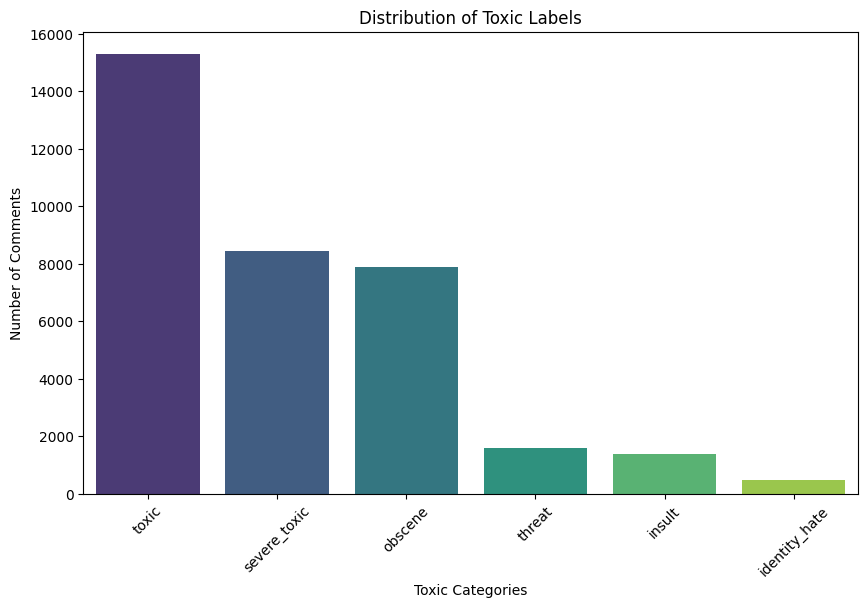

In [31]:
# Data distribution of label counts
class_columns = ['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']
class_distribution = data[class_columns].sum().sort_values(ascending=False)

# Plot the label distribution
plt.figure(figsize=(10,6))
sns.barplot(x=class_columns, y=class_distribution.values, palette="viridis", hue=class_columns, dodge=False, legend=False)
plt.title("Distribution of Toxic Labels")
plt.xlabel("Toxic Categories")
plt.ylabel("Number of Comments")
plt.xticks(rotation=45)
plt.show()


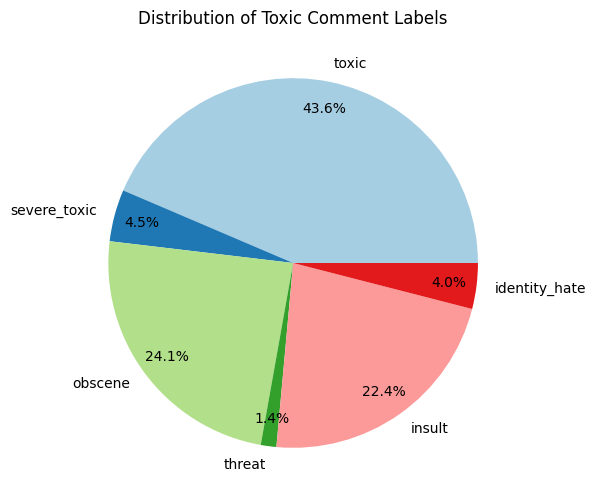

In [38]:
import matplotlib.pyplot as plt

# Plot the pie chart
temp = {}
class_columns = ['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']

for column in class_columns:
    temp[column] = data[column].sum()

plt.figure(figsize=(8, 6))
plt.pie(
    temp.values(),
    labels=temp.keys(),
    autopct='%1.1f%%',
    pctdistance=0.85,
    colors=plt.cm.Paired.colors
)
plt.title('Distribution of Toxic Comment Labels')
plt.show()


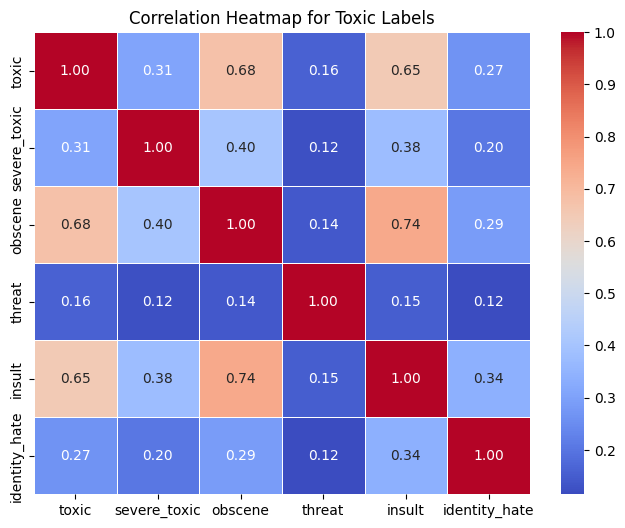

In [36]:
# Correlation heatmap for the toxic labels
class_columns = ['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']
correlation_matrix = data[class_columns].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap for Toxic Labels")
plt.show()


In [39]:

# Check data types
print("Data types in the dataset:")
print(data.dtypes)

# Convert columns to the correct type (if needed)
data['id'] = data['id'].astype(str)
data['comment_text'] = data['comment_text'].astype(str)

# Check for duplicates
print("\nChecking for duplicates:")
duplicates = data.duplicated(subset=['comment_text']).sum()
print(f"Number of duplicates: {duplicates}")

# Check the final state
print("\nData types after processing:")
print(data.dtypes)
print("\nSample comments:")
print(data['comment_text'].head())

Data types in the dataset:
id               object
comment_text     object
toxic             int64
severe_toxic      int64
obscene           int64
threat            int64
insult            int64
identity_hate     int64
dtype: object

Checking for duplicates:
Number of duplicates: 0

Data types after processing:
id               object
comment_text     object
toxic             int64
severe_toxic      int64
obscene           int64
threat            int64
insult            int64
identity_hate     int64
dtype: object

Sample comments:
0    Explanation\nWhy the edits made under my usern...
1    D'aww! He matches this background colour I'm s...
2    Hey man, I'm really not trying to edit war. It...
3    "\nMore\nI can't make any real suggestions on ...
4    You, sir, are my hero. Any chance you remember...
Name: comment_text, dtype: object


Text analysis


In [44]:
comments = data['comment_text']
comments_length = comments.str.len()

# Calculate average, minimum, and maximum comment lengths
average_comment_length = comments_length.mean()
min_comment_length = comments_length.min()
max_comment_length = comments_length.max()

# Calculate the average number of words in a comment
comments_word_count = comments.str.split().apply(len)
average_word_count = comments_word_count.mean()

# Output the results
print(f"Average comment length (in characters): {average_comment_length:.2f}")
print(f"Minimum comment length (in characters): {min_comment_length}")
print(f"Maximum comment length (in characters): {max_comment_length}")
print(f"Average word count in a comment: {average_word_count:.2f}")


Average comment length (in characters): 394.07
Minimum comment length (in characters): 6
Maximum comment length (in characters): 5000
Average word count in a comment: 67.27


<Figure size 1000x600 with 0 Axes>

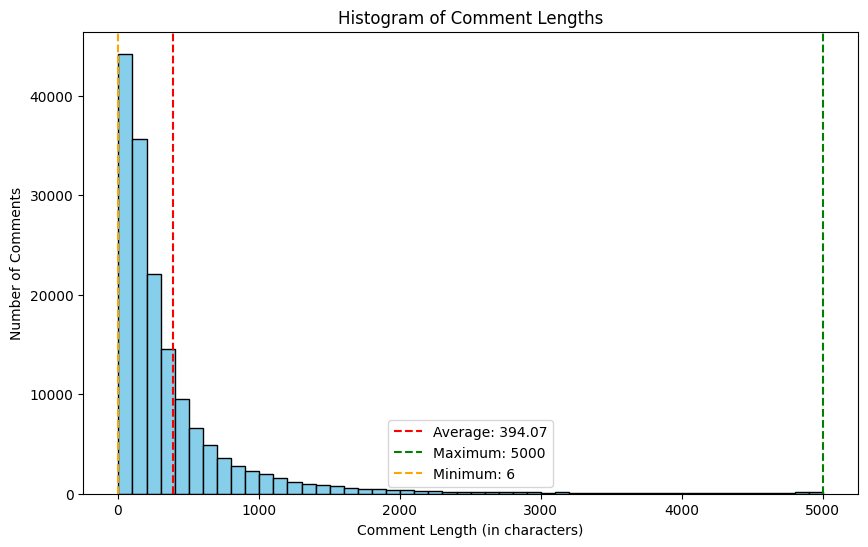

In [50]:


# Histogram of comment lengths (in characters)
plt.figure(figsize=(10, 6))
plt.hist(comments_length, bins=50, color='skyblue', edgecolor='black')
plt.axvline(average_comment_length, color='red', linestyle='dashed', linewidth=1.5, label=f'Average: {average_comment_length:.2f}')
plt.axvline(max_comment_length, color='green', linestyle='dashed', linewidth=1.5, label=f'Maximum: {max_comment_length}')
plt.axvline(min_comment_length, color='orange', linestyle='dashed', linewidth=1.5, label=f'Minimum: {min_comment_length}')
plt.xlabel("Comment Length (in characters)")
plt.ylabel("Number of Comments")
plt.title("Histogram of Comment Lengths")
plt.legend()
plt.show()


Length covering 80% of the comments: 528.00 characters


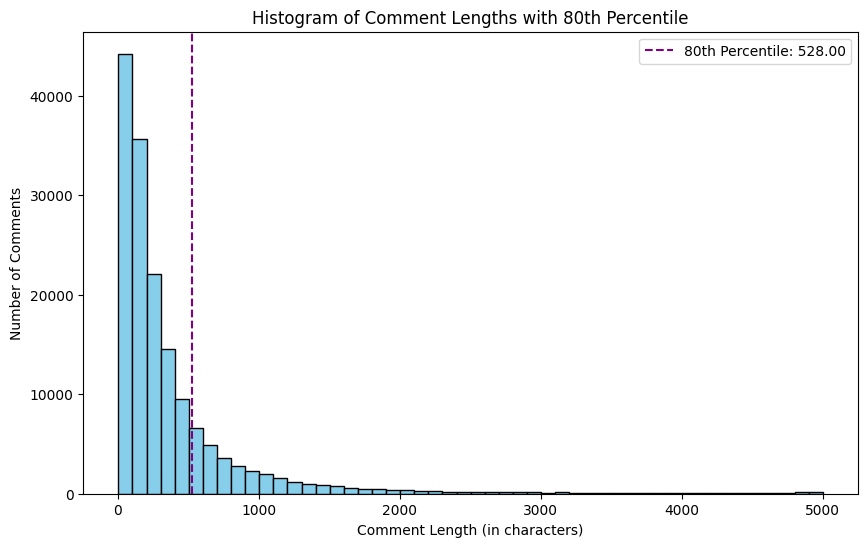

In [54]:

# Calculate the 80th percentile of comment lengths
eighty_percentile_length = np.percentile(comments_length, 80)

# Output the 80th percentile value
print(f"Length covering 80% of the comments: {eighty_percentile_length:.2f} characters")

# Visualization of comment length distribution with the 80th percentile
plt.figure(figsize=(10, 6))
plt.hist(comments_length, bins=50, color='skyblue', edgecolor='black')
plt.axvline(eighty_percentile_length, color='purple', linestyle='dashed', linewidth=1.5, label=f'80th Percentile: {eighty_percentile_length:.2f}')
plt.xlabel("Comment Length (in characters)")
plt.ylabel("Number of Comments")
plt.title("Histogram of Comment Lengths with 80th Percentile")
plt.legend()
plt.show()




Top 20 Words in
 Category

In [9]:

import nltk
import spacy
import string
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from string import punctuation
from heapq import nlargest
from sklearn.feature_extraction.text import TfidfVectorizer
from heapq import nlargest
from collections import Counter

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('punkt_tab')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [29]:
# Function to clean the text
def clean_text_for_analysis(text):
    # Remove newline characters
    text = re.sub(r'\n', ' ', text)
    # Remove extra spaces
    text = re.sub(r'\s+', ' ', text)
    # Remove dates and numbers
    text = re.sub(r'\b\d+\b', '', text)
    text = re.sub(r'\b\d{1,4}[-/]\d{1,4}[-/]\d{1,4}\b', '', text)
    # Remove non-alphabetic characters, keeping periods
    punctuation_to_remove = string.punctuation.replace(".", "")
    text = re.sub(f"[{re.escape(punctuation_to_remove)}]", " ", text)
    # Convert text to lowercase
    text = text.lower()
    return text

# Create a new column for cleaned data
data['cleaned_comment_text'] = data['comment_text'].apply(clean_text_for_analysis)

# Check the result
print("Original text:")
print(data['comment_text'].iloc[0])
print("\nCleaned text:")
print(data['cleaned_comment_text'].iloc[0])

Original text:
Explanation
Why the edits made under my username Hardcore Metallica Fan were reverted? They weren't vandalisms, just closure on some GAs after I voted at New York Dolls FAC. And please don't remove the template from the talk page since I'm retired now.89.205.38.27

Cleaned text:
explanation why the edits made under my username hardcore metallica fan were reverted  they weren t vandalisms  just closure on some gas after i voted at new york dolls fac. and please don t remove the template from the talk page since i m retired now....


In [30]:
# Define stop words
stop_words = set(stopwords.words('english'))

# Function to remove stop words
def remove_stopwords(text):
    words = text.split()
    filtered_words = [word for word in words if word not in stop_words]
    return ' '.join(filtered_words)

# Apply stop word removal to the cleaned text column
data['filtered_cleaned_comment_text'] = data['cleaned_comment_text'].apply(remove_stopwords)

# Check the result
print("Original cleaned text:")
print(data['cleaned_comment_text'].iloc[0])
print("\nFiltered cleaned text (without stop words):")
print(data['filtered_cleaned_comment_text'].iloc[0])

Original cleaned text:
explanation why the edits made under my username hardcore metallica fan were reverted  they weren t vandalisms  just closure on some gas after i voted at new york dolls fac. and please don t remove the template from the talk page since i m retired now....

Filtered cleaned text (without stop words):
explanation edits made username hardcore metallica fan reverted vandalisms closure gas voted new york dolls fac. please remove template talk page since retired now....


In [31]:
# Tokenize the text
data['tokenized_cleaned_comment_text'] = data['filtered_cleaned_comment_text'].apply(word_tokenize)

# Verify the result
print("Original cleaned text:")
print(data['cleaned_comment_text'].iloc[0])
print("\nTokenized text:")
print(data['tokenized_cleaned_comment_text'].iloc[0])

# Calculate the token count for each comment
data['token_count'] = data['tokenized_cleaned_comment_text'].apply(len)

# Check the total number of tokens
print(f"Total number of tokens: {data['token_count'].sum()}")

Original cleaned text:
explanation why the edits made under my username hardcore metallica fan were reverted  they weren t vandalisms  just closure on some gas after i voted at new york dolls fac. and please don t remove the template from the talk page since i m retired now....

Tokenized text:
['explanation', 'edits', 'made', 'username', 'hardcore', 'metallica', 'fan', 'reverted', 'vandalisms', 'closure', 'gas', 'voted', 'new', 'york', 'dolls', 'fac', '.', 'please', 'remove', 'template', 'talk', 'page', 'since', 'retired', 'now', '....']
Total number of tokens: 6178795


In [36]:
# Initialize TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_features=1000)  # Limit to 1000 most important words

class_columns = ['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']

# Function to get the top 20 toxic words for a class
def get_top_words_for_class(comments, vectorizer, top_n=20):
    tfidf_matrix = vectorizer.fit_transform(comments)
    feature_names = vectorizer.get_feature_names_out()
    word_scores = tfidf_matrix.sum(axis=0).A1
    word_scores_dict = dict(zip(feature_names, word_scores))
    top_words = Counter(word_scores_dict).most_common(top_n)
    return pd.DataFrame(top_words, columns=['Word', 'TF-IDF Score'])

# Dictionary to store top words for each class
top_words_per_class = {}

# Find the top 20 words for each class
for label in class_columns:
    print(f"Processing class: {label}...")
    class_comments = data[data[label] == 1]['tokenized_cleaned_comment_text'].apply(' '.join)
    top_words_df = get_top_words_for_class(class_comments, tfidf_vectorizer)
    top_words_per_class[label] = top_words_df

    # # Save as a separate file
    # top_words_df.to_csv(f'top_words_{label}.csv', index=False)
    # print(f"Top words for class '{label}' saved to 'top_words_{label}.csv'.")

# Combine all top words into one DataFrame for review
combined_top_words = pd.concat(
    [df.assign(Class=label) for label, df in top_words_per_class.items()],
    ignore_index=True
)

# Save the combined DataFrame
combined_top_words.to_csv('top_words_all_classes.csv', index=False)
print("Combined DataFrame with top words saved to 'top_words_all_classes.csv'.")

combined_top_words.head()

Processing class: toxic...
Processing class: severe_toxic...
Processing class: obscene...
Processing class: threat...
Processing class: insult...
Processing class: identity_hate...
Combined DataFrame with top words saved to 'top_words_all_classes.csv'.


,Word,TF-IDF Score,Class
0,fuck,771.865885,toxic
1,fucking,442.096674,toxic
2,like,406.698425,toxic
3,wikipedia,391.644550,toxic
4,shit,333.753968,toxic


Clean text for use with BERT

In [63]:
# Function to clean text for use with BERT
def clean_text_for_bert(text):
    # Remove newline characters
    text = re.sub(r'\n', ' ', text)
    # Remove extra spaces
    text = re.sub(r'\s+', ' ', text).strip()
    # Remove time in the format HH:MM
    text = re.sub(r'\b\d{1,2}:\d{2}\b', '', text)
    # Remove dates.
    text = re.sub(r'\b\d{4}[-/\.]\d{2}[-/\.]\d{2}\b', '', text)
    text = re.sub(r'\b\d{2}[-/\.]\d{2}[-/\.]\d{4}\b', '', text)
    # Remove IP addresses
    text = re.sub(r'\b\d{1,3}(?:\.\d{1,3}){3}\b', '', text)
    return text

# Create a new column for cleaned data
data['cleaned_comment_text_for_bert'] = data['comment_text'].apply(clean_text_for_bert)

# Check the result
print("Original text:")
print(data['comment_text'].iloc[0])
print("\nCleaned text:")
print(data['cleaned_comment_text_for_bert'].iloc[0])


Original text:
Explanation
Why the edits made under my username Hardcore Metallica Fan were reverted? They weren't vandalisms, just closure on some GAs after I voted at New York Dolls FAC. And please don't remove the template from the talk page since I'm retired now.89.205.38.27

Cleaned text:
Explanation Why the edits made under my username Hardcore Metallica Fan were reverted? They weren't vandalisms, just closure on some GAs after I voted at New York Dolls FAC. And please don't remove the template from the talk page since I'm retired now.


In [39]:
# Install the required libraries for working with transformers and PyTorch
!pip install transformers torch
# Import necessary libraries
import pandas as pd
import torch
from transformers import BertTokenizer

In [40]:
# Initialize the BERT tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

In [66]:
# Function for tokenizing text using the BERT tokenizer
def tokenize_text(text, max_len=128):
    encoded = tokenizer.encode_plus(
        text,
        add_special_tokens=True,
        max_length=max_len,
        padding='max_length',
        truncation=True,
        return_attention_mask=True,
        return_tensors='pt'
    )
    return encoded['input_ids'].squeeze(0), encoded['attention_mask'].squeeze(0)


In [68]:
# Converts label values into a PyTorch tensor
def encode_labels(row):
    return torch.tensor([row['toxic'], row['severe_toxic'], row['obscene'], row['threat'], row['insult'], row['identity_hate']])


In [69]:
# Function to prepare data for the model
def prepare_data(data, max_len=128):
    input_ids_list = []
    attention_masks_list = []
    labels_list = []

    for _, row in data.iterrows():
        # Tokenizing the text
        input_ids, attention_mask = tokenize_text(row['cleaned_comment_text_for_bert'], max_len)
        input_ids_list.append(input_ids)
        attention_masks_list.append(attention_mask)

        # Converting labels
        labels = encode_labels(row)
        labels_list.append(labels)

     # Creating the final DataFrame
    return pd.DataFrame({
        "input_ids": input_ids_list,
        "attention_mask": attention_masks_list,
        "labels": labels_list
    })


In [70]:
prepared_data = prepare_data(data, max_len=128)
print(prepared_data.head())



                                           input_ids  \
0  [tensor(101), tensor(7526), tensor(2339), tens...   
1  [tensor(101), tensor(1040), tensor(1005), tens...   
2  [tensor(101), tensor(4931), tensor(2158), tens...   
3  [tensor(101), tensor(1000), tensor(2062), tens...   
4  [tensor(101), tensor(2017), tensor(1010), tens...   

                                      attention_mask  \
0  [tensor(1), tensor(1), tensor(1), tensor(1), t...   
1  [tensor(1), tensor(1), tensor(1), tensor(1), t...   
2  [tensor(1), tensor(1), tensor(1), tensor(1), t...   
3  [tensor(1), tensor(1), tensor(1), tensor(1), t...   
4  [tensor(1), tensor(1), tensor(1), tensor(1), t...   

                                              labels  
0  [tensor(0), tensor(0), tensor(0), tensor(0), t...  
1  [tensor(0), tensor(0), tensor(0), tensor(0), t...  
2  [tensor(0), tensor(0), tensor(0), tensor(0), t...  
3  [tensor(0), tensor(0), tensor(0), tensor(0), t...  
4  [tensor(0), tensor(0), tensor(0), tensor(0), t..

In [71]:
# Convert columns to tensors
input_ids_tensor = torch.stack(prepared_data['input_ids'].tolist())
attention_mask_tensor = torch.stack(prepared_data['attention_mask'].tolist())
labels_tensor = torch.stack(prepared_data['labels'].tolist())

# Check shapes
print(f"Shape of input_ids: {input_ids_tensor.shape}")
print(f"Shape of attention_mask: {attention_mask_tensor.shape}")
print(f"Shape of labels: {labels_tensor.shape}")

Shape of input_ids: torch.Size([159571, 128])
Shape of attention_mask: torch.Size([159571, 128])
Shape of labels: torch.Size([159571, 6])


In [80]:
# print(input_ids_tensor[:2])

In [81]:

# print(attention_mask_tensor[0])

In [82]:

# print(labels_tensor[3])

In [83]:
# Create a DataFrame for BERT processing
bert_data = pd.DataFrame({
    'input_ids': input_ids_tensor.tolist(),
    'attention_mask': attention_mask_tensor.tolist(),
    'labels': labels_tensor.tolist()
})

# Save as CSV format
bert_data.to_csv('bert_ready_data.csv', index=False)
print("DataFrame saved as 'bert_ready_data.csv'.")



DataFrame saved as 'bert_ready_data.csv'.


In [84]:

loaded_data = pd.read_csv('bert_ready_data.csv')
print(loaded_data.head())


                                           input_ids  \
0  [101, 7526, 2339, 1996, 10086, 2015, 2081, 210...   
1  [101, 1040, 1005, 22091, 2860, 999, 2002, 3503...   
2  [101, 4931, 2158, 1010, 1045, 1005, 1049, 2428...   
3  [101, 1000, 2062, 1045, 2064, 1005, 1056, 2191...   
4  [101, 2017, 1010, 2909, 1010, 2024, 2026, 5394...   

                                      attention_mask              labels  
0  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...  [0, 0, 0, 0, 0, 0]  
1  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...  [0, 0, 0, 0, 0, 0]  
2  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...  [0, 0, 0, 0, 0, 0]  
3  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...  [0, 0, 0, 0, 0, 0]  
4  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...  [0, 0, 0, 0, 0, 0]  


In [85]:
# # Save as  formatPyTorch
# torch.save({
#     'input_ids': input_ids_tensor,
#     'attention_mask': attention_mask_tensor,
#     'labels': labels_tensor
# }, 'bert_ready_data.pt')
# print("Data saved as 'bert_ready_data.pt'.")


Data saved as 'bert_ready_data.pt'.
